<a href="https://www.kaggle.com/code/kulbaka/wine-quality-eda-prediction?scriptVersionId=150746498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white; display:fill; border-radius:00px; background-color:#DEA6AA; font-size:250%; font-family:Avenir; letter-spacing:3px">
    <p style="padding:20px; color:#E9E9E9; text-align:left;">
    <b>✏️ Table Of Content</b>
</p>
</div>
<div style="color:white; display:fill; border-radius:0px; background-color:#F8EEEF; font-size:100%; font-family:Avenir; letter-spacing:1px">
    <p style="padding:20px; color:#494947;">
        This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
        <br>The dataset describes the amount of various chemicals present in wine and their effect on it's quality.
    </p>
</div>

* [EDA](#eda)
    * [Descriptive Statistics](#eda_descr_stat)
    * [Missing Values ](#eda_missing)
    * [Duplicated Values](#eda_duplicated)
    * [Outliers](#eda_outlier)
    * [Target Distribution](#eda_target_distr)
    * [Features Distributions](#eda_feature_distr)
    * [Checking for balance](#eda_balance)
    * [Correlations](#eda_corr)
    * [EDA Conclusion](#eda_conclusion)
* [Modelling](#ml)
    * [Classification task](#classification)
    * [Regression task](#regression)
    * [ML Conclusion](#ml_conclusion)

<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Import Libraries</b>
</div>

In [1]:
import numpy as np 
import pandas as pd
import math

import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.set_palette(sns.color_palette("viridis"))

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, KFold

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Load Dataset</b>
</div>

In [2]:
df = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')
df.columns = [c.lower().replace(' ','_') for c in df.columns]
df['quality'] = df['quality'].apply(lambda x: x-3)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,4


<div style="color:#E9E9E9; display:fill; padding:20px; background-color:#DEA6AA; font-size:250%; font-family:Avenir; letter-spacing:3px; text-align:left;">
    <b>📊 EDA</b>
</div>
<a id='eda_descr_stat'>
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Descriptive Statistics</b>
</div>

In [3]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,2.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,2.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,3.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,3.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000,1597.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<a id='eda_missing'>
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Missing Values</b>
</div>

In [5]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

<a id='eda_duplicated'>
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
    <b>Duplicated Values</b>
</div> 

In [6]:
print("\nNumber of duplicated rows : ", df.drop(columns=['id']).duplicated().sum(),"\n")


Number of duplicated rows :  125 



In [7]:
def plot_dulicated(df):
    columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
               'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
               'ph', 'sulphates', 'alcohol', 'quality']
    plt.figure(figsize=(12, 8))

    for column_to_analyze in columns:
        plt.subplot(3, 4, columns.index(column_to_analyze) + 1)  # create subplots in a 3x4 grid

        unique_values = df[df.drop(columns=['id']).duplicated(keep='first') == False][column_to_analyze]
        duplicate_values = df[df.drop(columns=['id']).duplicated(keep='first') == True][column_to_analyze]
        sns.histplot(unique_values, color='skyblue', label='Unique Values', kde=True)
        sns.histplot(duplicate_values, color='salmon', label='Duplicate Values', kde=True)
        plt.title(f'Histogram of {column_to_analyze}')
        plt.xlabel(column_to_analyze)
        plt.ylabel('') 
        
    plt.tight_layout()
    plt.show()

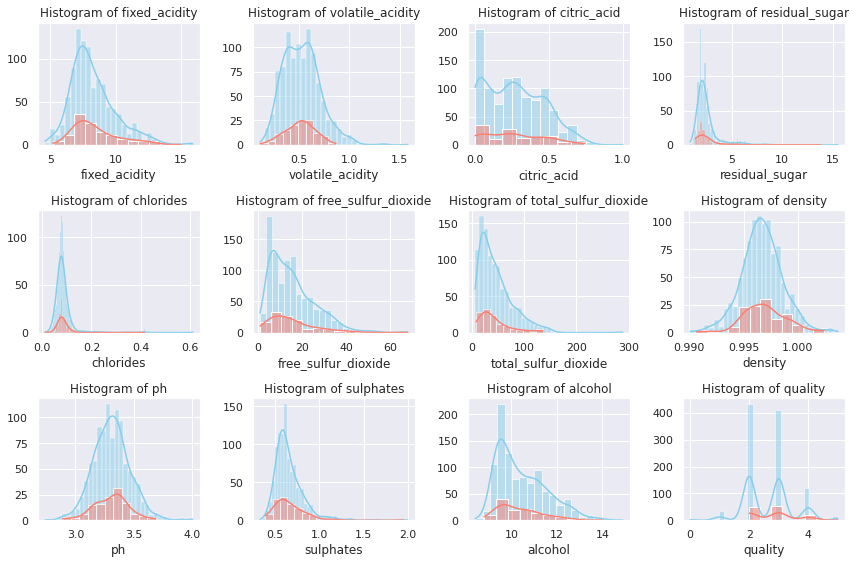

In [8]:
plot_dulicated(df)

In [9]:
# Stats with dropping duplicated rows

df.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'], keep='first').describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,2.641454,801.762279
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744,466.314822
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,2.000000,404.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,3.000000,791.500000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,3.000000,1203.750000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000,1597.000000


<a id='eda_outlier'>
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Outliers</b>
</div>

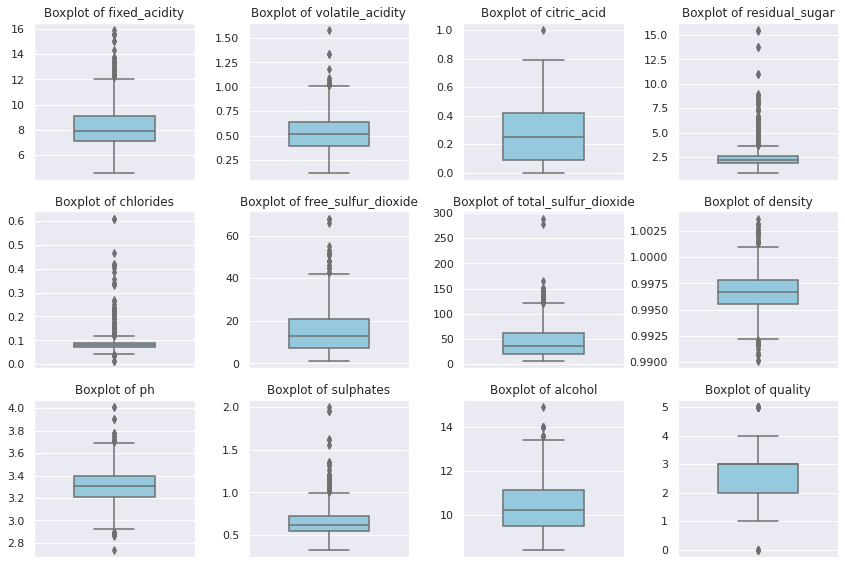

In [10]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
           'ph', 'sulphates', 'alcohol', 'quality']


plt.figure(figsize=(12, 8))

for feature in features:
    plt.subplot(3, 4, features.index(feature) + 1)
    sns.boxplot(data=df, y=feature, color='skyblue', width=0.5)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('')

plt.tight_layout()
plt.show()



Outliers in CHLORIDES




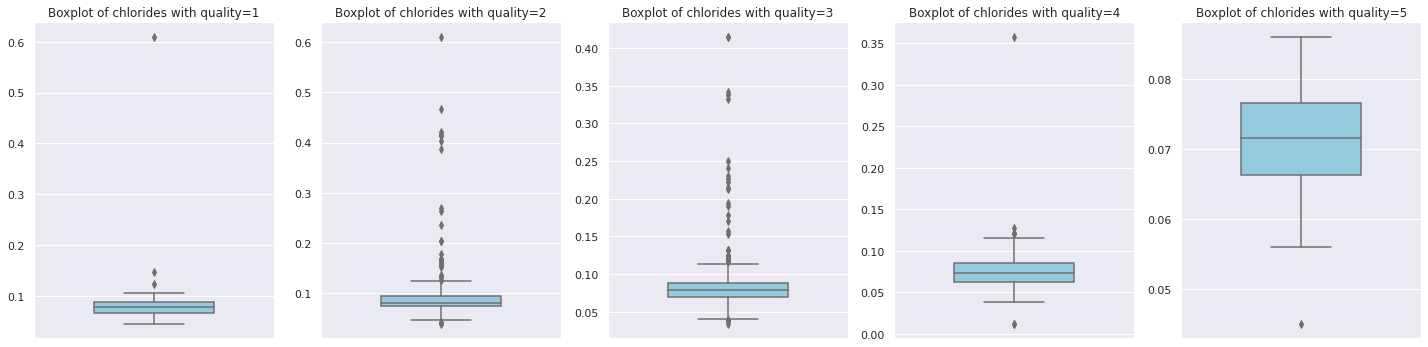



Outliers in RESIDUAL SUGAR




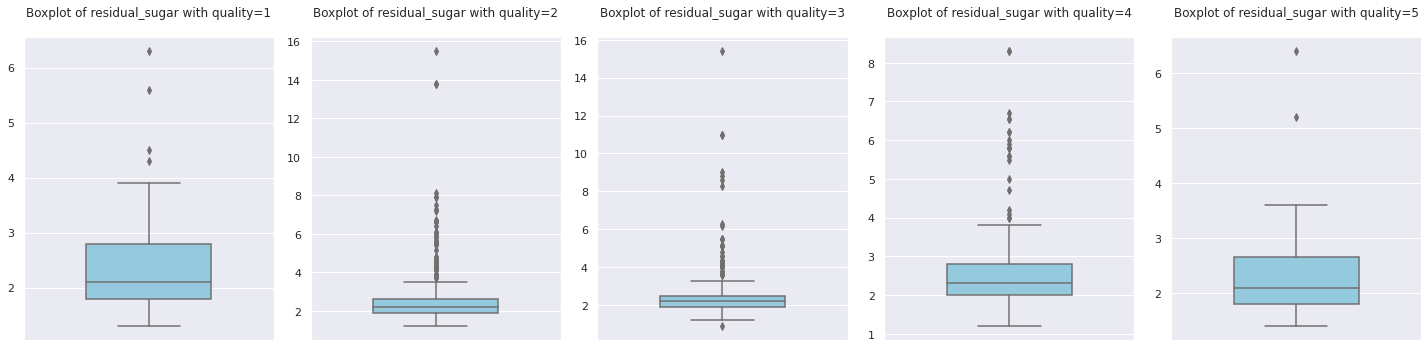



Outliers in SULPHATES




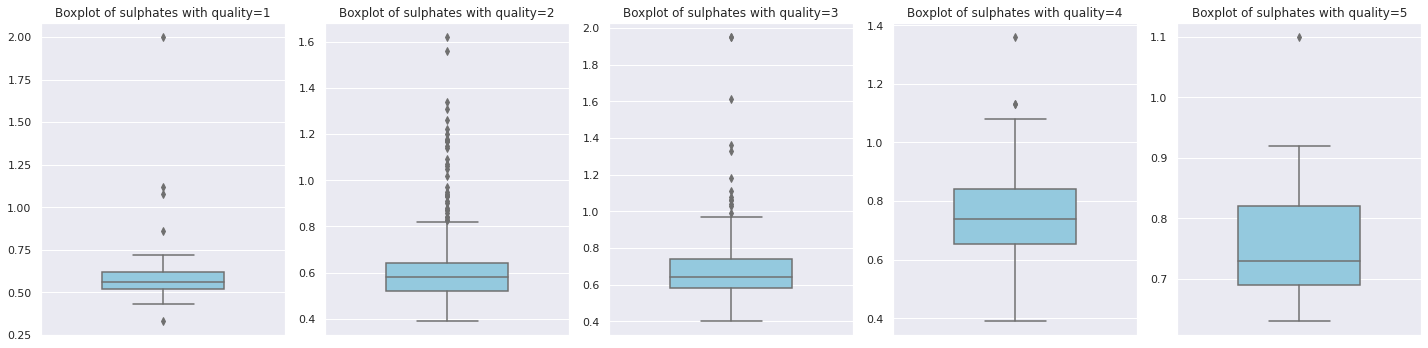



Outliers in ALCOHOL




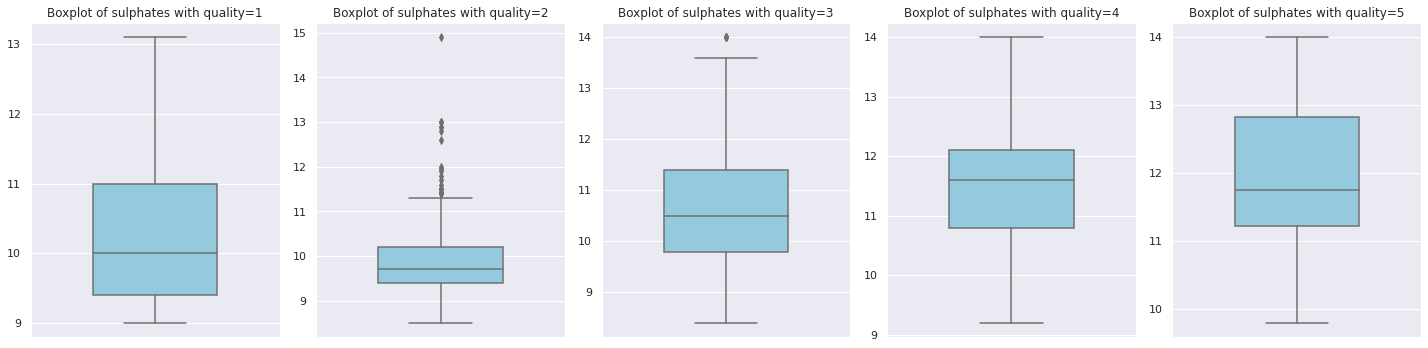

In [11]:
print("\n\nOutliers in CHLORIDES\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df[df['quality']==i], y='chlorides', color='skyblue', width=0.5)
    plt.title(f'Boxplot of chlorides with quality={i}')
    plt.ylabel('')
plt.tight_layout()
plt.show()


print("\n\nOutliers in RESIDUAL SUGAR\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df[df['quality']==i], y='residual_sugar', color='skyblue', width=0.5)
    plt.title(f'Boxplot of residual_sugar with quality={i}\n')
    plt.ylabel('')
plt.tight_layout()
plt.show()

print("\n\nOutliers in SULPHATES\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df[df['quality']==i], y='sulphates', color='skyblue', width=0.5)
    plt.title(f'Boxplot of sulphates with quality={i}')
    plt.ylabel('')
plt.tight_layout()
plt.show()


print("\n\nOutliers in ALCOHOL\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df[df['quality']==i], y='alcohol', color='skyblue', width=0.5)
    plt.title(f'Boxplot of sulphates with quality={i}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [12]:
percent_to_drop = 100 - 100*len(df[(df['residual_sugar']<=7) & (df['chlorides']<=0.4)])/len(df)

print(f"\nDropping selected outliers will result in loss of {percent_to_drop:.2f} % of data")


Dropping selected outliers will result in loss of 2.54 % of data


<a id='eda_target_distr'>
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Target Distribution</b>
</div>

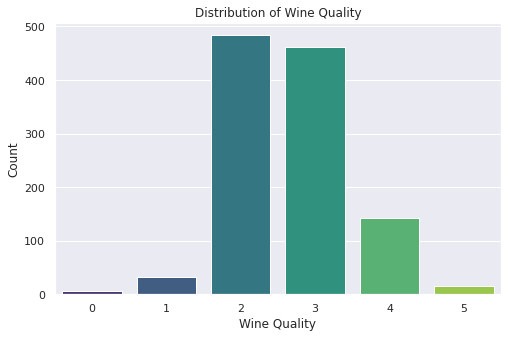

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality')#, palette='Set2')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

<a id='eda_feature_distr'>
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Feature Distributions</b>
</div>

In [14]:
def distplots_by_target(df, target, features):
    plt.figure(figsize=(12, 8))
    for feature in features:
        plt.subplot(math.floor(math.sqrt(len(features))), # hight of the grid
                    math.ceil(math.sqrt(len(features))), # length of the grid
                    features.index(feature) + 1)
        # add plot for each quality
        for q in sorted(df[target].unique()):

            sns.kdeplot(data=df[df[target]==q], x=feature, fill=True, label=q)
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')  
    plt.legend(title=str(target), loc='center right', bbox_to_anchor=(1.4, 0.5))

    plt.tight_layout()
    plt.show()

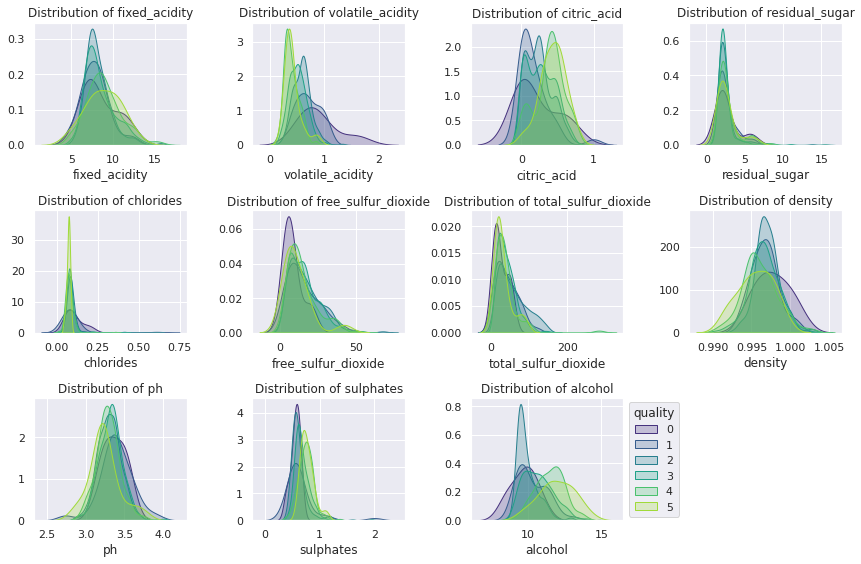

In [15]:
features = [ 'fixed_acidity', 'volatile_acidity', 'citric_acid',
             'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
             'total_sulfur_dioxide','density','ph','sulphates','alcohol' ]
distplots_by_target(df, 'quality', features)

<a id="eda_balance">
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Checking data for balance</b>
</div> 

In [16]:
def check_balance(dataset, target_column):
    class_frequencies = dataset[target_column].value_counts().to_dict()
    num_classes = len(class_frequencies)
    min_frequency = min(class_frequencies.values())
    max_frequency = max(class_frequencies.values())
    
    # Calculate the balance ratio
    balance_ratio = min_frequency / max_frequency
    
    # Determine if the dataset is balanced
    is_balanced = balance_ratio >= 0.9  

    balance_report = {
        "class_frequencies": class_frequencies,
        "num_classes": num_classes,
        "min_frequency": min_frequency,
        "max_frequency": max_frequency,
        "balance_ratio": balance_ratio,
        "is_balanced": is_balanced}
    return balance_report

target_column = 'quality'
balance_report = check_balance(df, target_column)

print("Class Frequencies:")
for class_label, frequency in balance_report["class_frequencies"].items():
    print(f"Class '{class_label}': {frequency} samples")

print(f"Number of Classes: {balance_report['num_classes']}")
print(f"Minimum Class Frequency: {balance_report['min_frequency']}")
print(f"Maximum Class Frequency: {balance_report['max_frequency']}")
print(f"Balance Ratio: {balance_report['balance_ratio']:.2f}")
print(f"Is Balanced: {balance_report['is_balanced']}")

Class Frequencies:
Class '2': 483 samples
Class '3': 462 samples
Class '4': 143 samples
Class '1': 33 samples
Class '5': 16 samples
Class '0': 6 samples
Number of Classes: 6
Minimum Class Frequency: 6
Maximum Class Frequency: 483
Balance Ratio: 0.01
Is Balanced: False


<a id="eda_corr">
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
<b>Correlations</b>
</div>

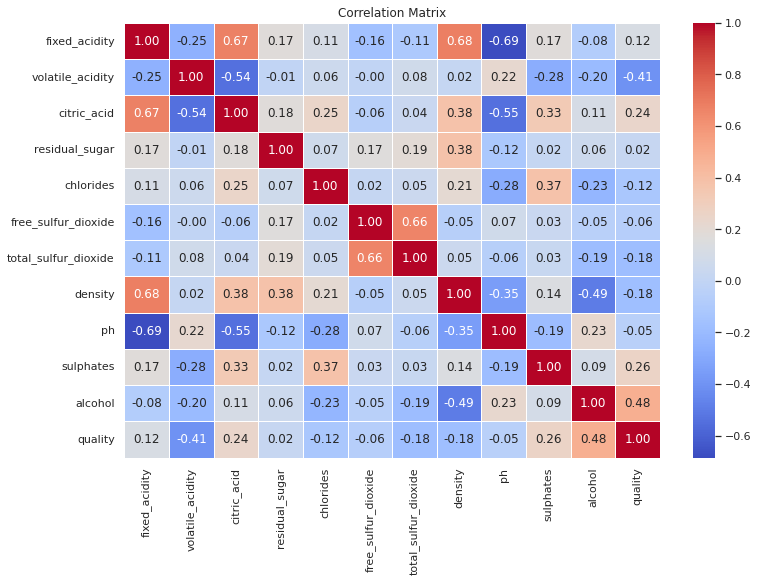

In [17]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'ph', 'sulphates', 'alcohol', 'quality']

correlation_data = df[features]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

<a id ="eda_conclusion">
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
    <b>EDA Conclusion</b>
</div>

<div style="color:white; display:fill; border-radius:0px; background-color:#F8EEEF; font-size:100%; font-family:Avenir; letter-spacing:1px">
    <p style="padding:30px; color:#494947;">
        1. No missing values
        <br><br>2. About 10% of rows were duplicated and has been removed
        <br><br>3. Outliers are present but seem to contain valuable information
        <br>&nbsp&nbsp&nbsp&nbspMost outliers are in
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp1. residual_sugar
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp2. chlorides
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp3. sulphates
        <br> We have removed a little bit of them that don't affect the quality with small number of data points:
        <br>* removed data points where df['residual_sugar'] > 7
        <br>* removed data points where df['chlorides'] > 0.4
<br><br>4. Best Quality Wine (4 and 5, we've shifted quality to be from 0 to 5) 
        <br>&nbsp&nbsp&nbsp&nbsp<b>Has highest</b>
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp1. alcohol
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp2. citric_acid
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp3. sulphates
        <br>&nbsp&nbsp&nbsp&nbsp<b>Has lowest</b> 
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp1. volatile_acidity
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp2. dencity
        <br>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp3. pH
<br>5. Dataset is unbalanced
    </p>
</div>
</div>

<a id="ml">
<div style="color:#E9E9E9; display:fill; padding:20px; background-color:#DEA6AA; font-size:250%; font-family:Avenir; letter-spacing:3px; text-align:left;">
    <b>🤖 Modelling</b>
</div>
    
<div style="color:#494947; display:fill; padding:50px; background-color:#F8EEEF; font-size:110%; font-family:Avenir-bold; letter-spacing:1px">
    Given that we are predicting wine quality as a discrete ordinal variable - both the classification and regression approaches seem to be appropliate. 
</div>

In [18]:
# Supporting Functions

def balance_dataset(dataset, target_column):
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    balanced_dataset = pd.concat([X_resampled, y_resampled], axis=1)
    return balanced_dataset

def strat_k_fold_classification(model, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, 
                          random_state=42, 
                          shuffle=True)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        precision = precision_score(y_test, y_pred, average='weighted')
        precision_scores.append(precision)
        recall = recall_score(y_test, y_pred, average='weighted')
        recall_scores.append(recall)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

    mean_accuracy_score = sum(accuracy_scores) / n_splits
    mean_precision_score = sum(precision_scores) / n_splits
    mean_recall_score = sum(recall_scores) / n_splits
    mean_f1_score = sum(f1_scores) / n_splits
    print(f"""\nMean Scores with Stratified K-Fold Cross-Validation:\n
            \nAccuracy: {mean_accuracy_score:.5f}
            \nPrecision: {mean_precision_score:.5f}
            \nRecall: {mean_recall_score:.5f}
            \nF1 score: {mean_f1_score:.5f}""")
    return {
        "mean_accuracy_score": mean_accuracy_score,
        "mean_precision_score": mean_precision_score,
        "mean_recall_score": mean_recall_score,
        "mean_f1_score": mean_f1_score,
    }

<a id="classification">
<div style="color:#E9E9E9; display:fill; padding:30px; background-color:#DEA6AA; font-size:150%; font-family:Avenir; letter-spacing:5px">
    <b>🔸 Classification Task: </b>
</div>

In [19]:
print("\n\nSelecting Best Model For Classification task:\n")

df = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')
df.columns = [c.lower().replace(' ','_') for c in df.columns]
df['quality'] = df['quality'].apply(lambda x: x-3)

# Drop Duplicates
# df.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
#       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
#       'ph', 'sulphates', 'alcohol', 'quality'], keep='first', inplace=True)
# df.reset_index(inplace=True)
# df.drop(columns = ['index'], inplace=True)

# Drop Outliers
# df = df[(df['residual_sugar']<=7) & (df['chlorides']<=0.4)]
# df.reset_index(inplace=True)
# df.drop(columns = ['index'], inplace=True)

# Balance data
df = balance_dataset(df, 'quality')

features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'ph', 'sulphates', 'alcohol']
X = df[features]
y = df['quality']

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = "accuracy"

models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())]

results = []
model_names = []

for name, model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    results.append(scores)
    model_names.append(name)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{name}: Mean {scoring} = {mean_score:.2f}, Standard Deviation = {std_score:.2f}")
    
best_model_idx = np.argmax([np.mean(scores) for scores in results])
best_model = models[best_model_idx][1]
best_model_name = model_names[best_model_idx]
print(f"\n\nBest Model: {best_model_name}\nWith {scoring}: {np.mean(results[best_model_idx])}")



Selecting Best Model For Classification task:

Logistic Regression: Mean accuracy = 0.47, Standard Deviation = 0.03
Decision Tree: Mean accuracy = 0.87, Standard Deviation = 0.01
Random Forest: Mean accuracy = 0.90, Standard Deviation = 0.01
Gradient Boosting: Mean accuracy = 0.87, Standard Deviation = 0.02
SVM: Mean accuracy = 0.39, Standard Deviation = 0.03
K-Nearest Neighbors: Mean accuracy = 0.79, Standard Deviation = 0.01
Naive Bayes: Mean accuracy = 0.54, Standard Deviation = 0.02


Best Model: Random Forest
With accuracy: 0.9013208447679275


<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
    <b>Hyperparameter Tuning</b>
</div>

In [20]:
param_grid = {
    'n_estimators': [100, 195],
    'max_depth': [20, 30],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'bootstrap': [False]}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X, y)
rf_classifier_best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
print("\nBest Hyperparameters:\n")
print(rf_classifier_best_params)


Best Hyperparameters:

{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


<div style="color:white; display:fill; border-radius:0px; background-color:#F8EEEF; font-size:100%; font-family:Avenir-bold; letter-spacing:1px">
    <p style="padding:50px; color:#494947;">
        <b>Best Parameters for Random Forest Classifier:</b>
        <br><br> rf_classifier_best_params = {<br>
               &nbsp&nbsp&nbsp&nbsp&nbsp'bootstrap': False,<br> 
               &nbsp&nbsp&nbsp&nbsp&nbsp'max_depth': 20,<br> 
               &nbsp&nbsp&nbsp&nbsp&nbsp'min_samples_leaf': 1,<br>  
               &nbsp&nbsp&nbsp&nbsp&nbsp'min_samples_split': 3,<br> 
               &nbsp&nbsp&nbsp&nbsp&nbsp'n_estimators': 100<br>}
    </p>
</div>      

<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
    <b>Final Classification</b>
</div>


Mean Scores with Stratified K-Fold Cross-Validation:

            
Accuracy: 0.91168
            
Precision: 0.91028
            
Recall: 0.91168
            
F1 score: 0.91041


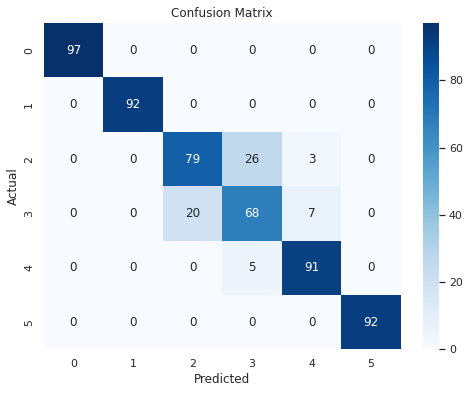

In [21]:
df = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')
df.columns = [c.lower().replace(' ','_') for c in df.columns]
df['quality'] = df['quality'].apply(lambda x: x-3)

# Balance data
df = balance_dataset(df, 'quality')

# Train-test split
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'ph', 'sulphates', 'alcohol']
X = df[features]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'bootstrap': False, 
               'max_depth': 20, 
               'min_samples_leaf': 1, 
               'min_samples_split': 3, 
               'n_estimators': 100}

rf_classifier = RandomForestClassifier(random_state=42, **best_params)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
strat_k_fold_classification(rf_classifier, 10)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<a id="regression">
<div style="color:#E9E9E9; display:fill; padding:30px; background-color:#DEA6AA; font-size:150%; font-family:Avenir; letter-spacing:5px">
    <b>🔸 Regression Task:</b>
</div>

In [22]:
print("\n\nSelecting Best Model For Regression task:\n")

df = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')
df.columns = [c.lower().replace(' ','_') for c in df.columns]
df['quality'] = df['quality'].apply(lambda x: x-3)

# Drop duplicates
df = df.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                                'ph', 'sulphates', 'alcohol', 'quality'], keep='first')

# Drop outliers
df = df[(df['residual_sugar']<=7) & (df['chlorides']<=0.4)]
df.reset_index(inplace=True)
df.drop(columns = ['index'], inplace=True)

# Balance
df = balance_dataset(df, 'quality')

features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'ph', 'sulphates', 'alcohol']
X = df[features]
y = df['quality']

# Scale Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = "neg_mean_squared_error"

models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]

results = []
model_names = []

for name, model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    results.append(scores)
    model_names.append(name)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{name}: Mean {scoring} = {mean_score:.2f}, Standard Deviation = {std_score:.2f}")

best_model_idx = np.argmin([np.mean(np.abs(scores)) for scores in results])
best_model = models[best_model_idx][1]
best_model_name = model_names[best_model_idx]

print(f"\n\nBest Model: {best_model_name}")
print(f"\n\nBest Model {scoring}: {np.mean(results[best_model_idx])}")



Selecting Best Model For Regression task:

Linear Regression: Mean neg_mean_squared_error = -0.84, Standard Deviation = 0.10
Decision Tree Regressor: Mean neg_mean_squared_error = -0.20, Standard Deviation = 0.04
Random Forest Regressor: Mean neg_mean_squared_error = -0.12, Standard Deviation = 0.02


Best Model: Random Forest Regressor


Best Model neg_mean_squared_error: -0.11523549642699045


<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
    <b>Hyperparameters Tuning</b>
</div>

In [23]:
df = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')
df.columns = [c.lower().replace(' ','_') for c in df.columns]
df['quality'] = df['quality'].apply(lambda x: x-3)

# Drop duplicates
df.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'], keep='first',inplace=True)

# Drop outliers
df = df[(df['residual_sugar']<=7) & (df['chlorides']<=0.35)]
df.reset_index(inplace=True)
df.drop(columns = ['index'], inplace=True)

# Balance
df = balance_dataset(df, 'quality')

# Scale Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Tain_test_split
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'ph', 'sulphates', 'alcohol']
X = df[features]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [925, 1000],
    'max_depth': [18, 20],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf_regressor = grid_search.best_params_
best_estimator_rf_regressor = grid_search.best_estimator_
print(f'\nBest Parameters: {best_params_rf_regressor}')


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


<div style="color:white; display:fill; border-radius:0px; background-color:#F8EEEF; font-size:100%; font-family:Avenir-bold; letter-spacing:1px">
    <p style="padding:50px; color:#494947;">
        <b>Best Parameters for Random Forest Regressor:</b>
        <br><br> 
        best_params_rf_regressor = <br>{
    <br>&nbsp&nbsp&nbsp&nbsp&nbsp'max_depth': 20, 
    <br>&nbsp&nbsp&nbsp&nbsp&nbsp'max_features': 'sqrt', 
    <br>&nbsp&nbsp&nbsp&nbsp&nbsp'min_samples_leaf': 1, 
    <br>&nbsp&nbsp&nbsp&nbsp&nbsp'min_samples_split': 2, 
    <br>&nbsp&nbsp&nbsp&nbsp&nbsp'n_estimators': 930,
        <br>
        }</p></div>

In [24]:
best_params_rf_regressor

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
    <b>Final Regression</b>
</div>

Mean Squared Error: 0.0734


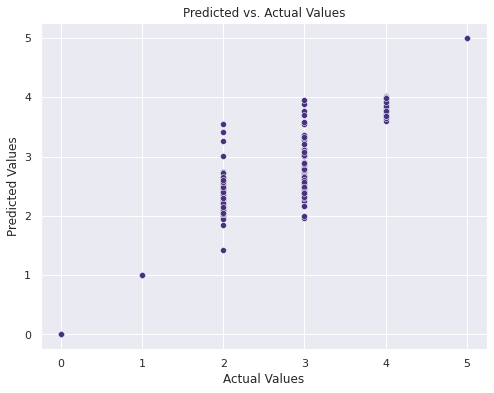

In [25]:
df = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')
df.columns = [c.lower().replace(' ','_') for c in df.columns]
df['quality'] = df['quality'].apply(lambda x: x-3)

# Remove Duplicates
df.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'], keep='first',inplace=True)

# Remove Outliers
df = df[(df['residual_sugar']<=7) & (df['chlorides']<=0.35)]
df.reset_index(inplace=True)
df.drop(columns = ['index'], inplace=True)

# Balance Dataset
df = balance_dataset(df, 'quality')

# Scale Features
X = StandardScaler().fit_transform(X)

# Tain-Test split
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'ph', 'sulphates', 'alcohol']
X = df[features]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'max_depth': 20,
               'max_features': 'sqrt',
               'min_samples_leaf': 1,
               'min_samples_split': 2,
               'n_estimators': 930}

rf_regressor = RandomForestRegressor(random_state=42, **best_params)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

# Evaluate on test set
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_test:.4f}')

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

# Mean Squared Error on Test Set: 0.0734
# with df[(df['residual_sugar']<=7) & (df['chlorides']<=0.35)]

<a id ="ml_conclusion">
<div style="font-size:150%; padding-top:50px; font-family:Avenir; letter-spacing:5px">
    <b>ML Conclusion</b>
</div>

<div style="color:#494947; display:fill; border-radius:0px; background-color:#F8EEEF; font-size:100%; font-family:Avenir-bold; letter-spacing:1px; padding:20px">
<h3>Classification task</h3>
    Best performing model:  <b>Random Forest Classifier </b>
<br>Outliers and duplicated rows: not dropping since it resulting in a lower model score
<br>Balancing data: yes
<br>Best model parameters:
<br>{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100} 
<br><br><b>Evaluation Metrics with best parameters:</b>
<br>* Accuracy: 0.91168
<br>* Precision: 0.91028
<br>* Recall: 0.91168
<br>* F1 score: 0.91041

<h3>Regression task</h3>
    Best performing model:  <b>Random Forest Regressor</b>
<br>Outliers and duplicated rows: dropping outliers and duplicates
<br>Balancing data: yes
<br>Best model parameters:
<br>{'max_depth': 20, 'max_features':'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 930}
<br><br><b>Evaluation Metrics with best parameters:</b>
<br>Mean Squared Error: 0.0734
</div>